# TELECOM CHURN CASE STUDY
### Problem Statement:
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

### Business Goal 
In this competition, primary goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

## Approach

#### STEP 1 : Data Understanding, Preparation, and Pre-Processing :
Data understanding, identification of potentially useful and non-useful attributes and variable importance and impact estimation
Data preparation, performing data cleaning, missing values imputation, outlier removal, and column level standardization (for e.g., date, etc.) into one format
 
#### STEP 2 : Exploratory Data Analysis :
Performing basic preliminary data analysis including finding the correlation between variables and scatter plots to identify relationships between variables
Performing advanced data analysis, including plotting relevant heatmaps, histograms, and basic clustering to find patterns in the data
 
#### STEP 3 : Feature Engineering and Variable Transformation :
Feature engineering and performing one or more methods on attributes that can lead to the creation of a new potentially useful variable; for e.g., day from the date
Variable transformation and applying categorical variable transformations to turn into numerical data and numerical variable transformations to scale data
 
#### STEP 4 : Model Selection, Model Building, and  Prediction :
Identifying the type of problem and making a list of decisive models from all available choices
Choosing a training mechanism; for e.g., cross-validation, etc., and tuning hyperparameters of each model
Testing each model on the respective model evaluation metric
Choosing the best model based on the fit of the data set and output variable
Using ensemble options to improve the efficacy based on the evaluation metric stated in the problem

#### STEP 5 : Business Recommendation

## STEP 1: Data Understanding, Preparation, and Pre-Processing :

In [6]:
# importing python and visualization libraries
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import warnings
warnings.filterwarnings('ignore')

# importing Data Preparation libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import StratifiedShuffleSplit


# importing libraries for Model building 
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier

# importing libraries for model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

pd.options.display.max_columns = 300

In [7]:
# reading the train dataset
telecom = pd.read_csv("train.csv")

In [8]:
# checking the top 5 rows for understanding
telecom.head(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [9]:
# checking the info of training dataset columns
telecom.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [10]:
# Statistical analysis of the numercial features
telecom.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69999.0,34999.000000,20207.115084,0.0,17499.5,34999.0,52498.5,69998.00
circle_id,69999.0,109.000000,0.000000,109.0,109.0,109.0,109.0,109.00
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
std_og_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...
aon,69999.0,1220.639709,952.426321,180.0,468.0,868.0,1813.0,4337.00
aug_vbc_3g,69999.0,68.108597,269.328659,0.0,0.0,0.0,0.0,12916.22
jul_vbc_3g,69999.0,65.935830,267.899034,0.0,0.0,0.0,0.0,9165.60
jun_vbc_3g,69999.0,60.076740,257.226810,0.0,0.0,0.0,0.0,11166.21


In [11]:
telecom.shape

(69999, 172)

In [12]:
# Checking the missing values and pecentage in telecom_churn_Info_df 
missing_df_sum = telecom.isnull().sum().sort_values(ascending=False)
missing_df_percent = (telecom.isnull().sum()/telecom.isnull().count()).sort_values(ascending=False)
missing_df_data = pd.concat([missing_df_sum, missing_df_percent*100], axis=1, keys=['Sum', 'Percent'])
missing_df_data[missing_df_data.Percent >70]

,Sum,Percent
arpu_3g_6,52431,74.902499
count_rech_2g_6,52431,74.902499
night_pck_user_6,52431,74.902499
arpu_2g_6,52431,74.902499
date_of_last_rech_data_6,52431,74.902499
total_rech_data_6,52431,74.902499
av_rech_amt_data_6,52431,74.902499
max_rech_data_6,52431,74.902499
count_rech_3g_6,52431,74.902499
fb_user_6,52431,74.902499


### Handling missing values

In [13]:
# function to select columns with high missing value
def selecting_columns_for_high_missing_values(telecom, per_miss_value):
    rows = telecom.shape[0]
    miss_cols = []
    null_value_df = telecom.isna()
    for col in null_value_df:
        null_count=telecom[col].isna().sum()
        if (null_count/rows) > per_miss_value:
            miss_cols.append(col)
    return miss_cols

In [14]:
# dropping columns with high missing value
telecom.drop(selecting_columns_for_high_missing_values(telecom, 0.7), inplace=True, axis=1)

## STEP 2 : EDA

In [15]:
# checking for class imbalance
telecom['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

### Checking for Data Imbalance

0    89.811283
1    10.188717
Name: churn_probability, dtype: float64


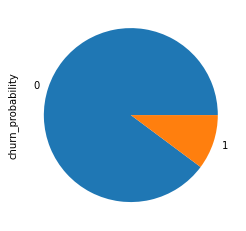

In [16]:
# plot for class imbalance
print((telecom['churn_probability'].value_counts()/len(telecom))*100)
((telecom['churn_probability'].value_counts()/len(telecom))*100).plot(kind="pie")
plt.show()

In [17]:
# checking data again for missing values
# This time less than 70%
missing_df_data[missing_df_data.Percent <= 70]

,Sum,Percent
isd_og_mou_8,3703,5.290076
std_ic_t2o_mou_8,3703,5.290076
std_og_t2c_mou_8,3703,5.290076
std_ic_t2f_mou_8,3703,5.290076
std_og_mou_8,3703,5.290076
...,...,...
last_day_rch_amt_8,0,0.000000
vol_2g_mb_6,0,0.000000
vol_2g_mb_7,0,0.000000
vol_2g_mb_8,0,0.000000


#### OBSERVATION -

- Most of the missing data shows that the user has not availed the services during that phase. So, its intuitive to fill these values with 0.

In [18]:
# imputing zeroes for null values
telecom=telecom.fillna(0)

In [19]:
telecom.shape

(69999, 142)

In [20]:
# checking for null values
telecom.isna().sum().sum()

0

In [21]:
# Data looks clean with no missing values
# checking againg stattistical summary of features
telecom.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,127.887939,128.754731,125.943607,191.010582,189.585401,186.146273,9.379276,6.745305,6.634328,13.625476,9.464386,9.254848,45.050076,44.394344,43.269280,89.551272,87.313796,86.301054,3.595161,3.632045,3.467948,1.081499,1.308807,1.345676,138.203540,135

In [22]:
# checking for unique values
# dropping columns with value equals to 1
unique_values_equals_1=[]
for i in telecom.columns:
    if telecom[i].nunique() == 1:
        unique_values_equals_1.append(i)
    else:
        pass
print("\n List of columns to be dropped from the dataset with only 1 unique value are :\n",
      unique_values_equals_1)
telecom.drop(unique_values_equals_1, axis=1, inplace = True)


 List of columns to be dropped from the dataset with only 1 unique value are :
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [23]:
# looking at statistical summary
# id is different for all customers, so dropping it
# last_date_of_month_7 and last_date_of_month_8, have a fixed value and doesn't seem to be important features
# so, dropping them
drop_cols=['id', 'last_date_of_month_7', 'last_date_of_month_8']

telecom.drop(drop_cols,inplace=True,axis=1)

In [24]:
# let's look at only churn customers
telecom_churn=telecom[telecom['churn_probability'] == 1]

In [25]:
telecom_churn.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.00000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.00000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.000000,7132.0
mean,308.289067,219.081400,114.226380,166.784865,115.935868,49.731139,208.525578,146.238458,62.277647,16.007982,15.519393,14.477426,24.591959,21.067705,20.169801,27.382006,17.480652,7.165370,53.537061,36.110890,14.330600,1.660059,1.291847,0.656748,1.072225,1.327782,0.578655,82.584096,54.887182,22.154563,129.064177,89.399222,33.810116,134.04394,92.975660,34.441896,0.574268,0.487637,0.176948,263.685440,182.864829,68.430024,1.407658,0.873006,0.521457,4.128840,4.236813,1.515799,0.557518,0.010646,0.000530,352.370766,242.877399,92.624937,30.374544,21.802458,7.649083,62.135808,41.270276,16.614169,5.194547,3.662371,1.326970,97.710658,66.739523,25.592482,10.729403,8.061321,2.938589,21.066706,13.852450,

## Univariate and Bivariate 

In [26]:
# creating a new dataframe for EDA
telecom_eda_df = telecom.copy()

In [27]:
# Calculate tenure_range
data = telecom_eda_df
#Age on network(aon) - number of days the customer is using the operator T network
data['tenure'] = data['aon']/30
data['tenure'].head()
tenure_range = [0, 6, 12, 24, 60, 61]
tenure_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
data['tenure_range'] = pd.cut(data['tenure'], tenure_range, labels=tenure_label)
data['tenure_range'].head()

0        NaN
1    1-2 Yrs
2    2-5 Yrs
3    2-5 Yrs
4    1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

In [28]:
# # Plotting a bar plot for tenure range
# plt.figure(figsize=[12,7])
# sns.barplot(x='tenure_range',y='churn_probability', data=telecom_eda_df)
# plt.show()

**Observations:**
- We can observe that customer churn Probability is higher in 0-6 months tenure range. So, new customers are most likely to churn

In [29]:
# # plot for tenure_range
# plt.figure(figsize=(14,8))
# sns.countplot(x = 'tenure_range', hue = 'churn_probability',data = data,palette=("plasma"))
# plt.show()

**Observations:**
- Old customers are most likely to not churn

In [30]:
# plt.figure(figsize=(14,8))
# data = telecom_eda_df
# ax = sns.distplot(data['tenure'], hist=True, kde=False, 
#              bins=int(180/5), color = 'green', 
#              hist_kws={'edgecolor':'red'},
#              kde_kws={'linewidth': 4})
# ax.set_ylabel('Number of Customers')
# ax.set_xlabel('Tenure in Months')
# ax.set_title('Customers Vs Tenure')
# plt.show()

**Observations:**
- Number of old customers are quite less than number of new customers
- Suggestive of, business should retain old customers

In [31]:
# # plot for total_rech_amt for month 6, 7 and 8 months

# plt.figure(figsize=(20,10))
# data = telecom_eda_df
# plt.subplot(2,3,1)
# sns.boxplot(data=data, y="total_rech_amt_6",x="churn_probability",hue="churn_probability",
# showfliers=False,palette=("plasma"))
# plt.subplot(2,3,2)
# sns.boxplot(data=data, y="total_rech_amt_7",x="churn_probability",hue="churn_probability",
#                 showfliers=False,palette=("plasma"))
# plt.subplot(2,3,3)
# sns.boxplot(data=data, y="total_rech_amt_8",x="churn_probability",hue="churn_probability",
#                 showfliers=False,palette=("plasma"))
# plt.show()

**Observations:**
- We can observe a good amount of drop in the total recharge amount for churned customers in the 8th Month (Action Phase).

In [32]:
# # plot for max_rech_amt for month 6, 7 and 8 months

# plt.figure(figsize=(20,10))
# data = telecom_eda_df
# plt.subplot(2,3,1)
# sns.boxplot(data=data, y="max_rech_amt_6",x="churn_probability",hue="churn_probability",
# showfliers=False,palette=("plasma"))
# plt.subplot(2,3,2)
# sns.boxplot(data=data, y="max_rech_amt_7",x="churn_probability",hue="churn_probability",
#                 showfliers=False,palette=("plasma"))
# plt.subplot(2,3,3)
# sns.boxplot(data=data, y="max_rech_amt_8",x="churn_probability",hue="churn_probability",
#                 showfliers=False,palette=("plasma"))
# plt.show()

**Observations:**
- We can clearly observe that there is a huge drop in maximum recharge amount for data in the 8th month (action phase) for churned customers.

In [33]:
# # plot for total_rech_num for month 6, 7 and 8 months
# plt.figure(figsize=(20,10))
# data = telecom_eda_df
# plt.subplot(2,3,1)
# sns.boxplot(data=data, y="total_rech_num_6",x="churn_probability",hue="churn_probability",
# showfliers=False,palette=("plasma"))
# plt.subplot(2,3,2)
# sns.boxplot(data=data, y="total_rech_num_7",x="churn_probability",hue="churn_probability",
#                 showfliers=False,palette=("plasma"))
# plt.subplot(2,3,3)
# sns.boxplot(data=data, y="total_rech_num_8",x="churn_probability",hue="churn_probability",
#                 showfliers=False,palette=("plasma"))
# plt.show()

**Observations:**
- We can observe a huge drop in total recharge number in the 8th month (action phase) for churned customers.

In [34]:
# # plot for last_day_rch_amt for month 6, 7 and 8 month
# plt.figure(figsize=(20,10))
# data = telecom_eda_df
# plt.subplot(2,3,1)  
# sns.boxplot(data=data, y="last_day_rch_amt_6",x="churn_probability",hue="churn_probability",
# showfliers=False,palette=("plasma"))
# plt.subplot(2,3,2)
# sns.boxplot(data=data, y="last_day_rch_amt_7",x="churn_probability",hue="churn_probability",
#                 showfliers=False,palette=("plasma"))
# plt.subplot(2,3,3)
# sns.boxplot(data=data, y="last_day_rch_amt_8",x="churn_probability",hue="churn_probability",
#                 showfliers=False,palette=("plasma"))
# plt.show()

**Observations:**
- Its clearly visible that we are getting a drop in 8th month recharge amount for churned customers.

In [35]:
# # plot for vol_2g_mb and vol_3g_mb for month 6, 7 and 8 month
# plt.figure(figsize=(24,10))
# data = telecom_eda_df
# plt.subplot(2,4,1)
# sns.boxplot(data=data, y="vol_2g_mb_6",x="churn_probability",hue="churn_probability",
# showfliers=False,palette=("plasma"))
# plt.subplot(2,4,2)
# sns.boxplot(data=data, y="vol_2g_mb_7",x="churn_probability",hue="churn_probability",
#                 showfliers=False,palette=("plasma"))
# plt.subplot(2,4,3)
# sns.boxplot(data=data, y="vol_2g_mb_8",x="churn_probability",hue="churn_probability",
#                 showfliers=False,palette=("plasma"))
# plt.subplot(2,4,4)
# sns.boxplot(data=data, y="vol_3g_mb_6",x="churn_probability",hue="churn_probability",
# showfliers=False,palette=("plasma"))
# plt.subplot(2,4,5)
# sns.boxplot(data=data, y="vol_3g_mb_7",x="churn_probability",hue="churn_probability",
#                 showfliers=False,palette=("plasma"))
# plt.subplot(2,4,6)
# sns.boxplot(data=data, y="vol_3g_mb_8",x="churn_probability",hue="churn_probability",
#                 showfliers=False,palette=("plasma"))
# plt.show()

**Observations:**
- We cant infer anything out of 2G/3G volume data for the month 6,7 and 8 as value range is very low, hence graph is not giving us proper justification result. Lets do analysis by checking mean value.

In [36]:
# let's check monthly 2G/3G service schemes
volume_2g_3g = telecom_eda_df.columns[telecom_eda_df.columns.str.contains('vol_2g|vol_3g',regex=True)]
volume_2g_3g.tolist()

['vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8']

In [37]:
# df_0 = telecom_eda_df[telecom_eda_df.churn_probability==0].filter(volume_2g_3g)
# df_1 = telecom_eda_df[telecom_eda_df.churn_probability==1].filter(volume_2g_3g)

# mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
# mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

# frames = [mean_df_0, mean_df_1]
# mean_bar = pd.concat(frames)

# mean_bar.T.plot.bar(figsize=(10,5),rot=0)
# plt.show()

**Observations:**
- Constant decline in 2g/3g services for churned customers from june to august
- However, 3g services are used more for non-churning customers

In [38]:
# # plot for onnet_mou for month 6, 7 and 8 month
# plt.figure(figsize=(20,10))
# data = telecom_eda_df
# plt.subplot(2,3,1)
# sns.boxplot(data=data, y="onnet_mou_6",x="churn_probability",hue="churn_probability",
# showfliers=False,palette=("plasma"))
# plt.subplot(2,3,2)
# sns.boxplot(data=data, y="onnet_mou_7",x="churn_probability",hue="churn_probability",
#                 showfliers=False,palette=("plasma"))
# plt.subplot(2,3,3)
# sns.boxplot(data=data, y="onnet_mou_8",x="churn_probability",hue="churn_probability",
#                 showfliers=False,palette=("plasma"))
# plt.show()

In [39]:
# let's check onnet usage service columns
onnet_usage_service = telecom_eda_df.columns[telecom_eda_df.columns.str.contains('^onnet.*mou',regex=True)]
onnet_usage_service.tolist()

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']

In [40]:
# df_0 = telecom_eda_df[telecom_eda_df.churn_probability==0].filter(onnet_usage_service)
# df_1 = telecom_eda_df[telecom_eda_df.churn_probability==1].filter(onnet_usage_service)

# mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
# mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

# frames = [mean_df_0, mean_df_1]
# mean_bar = pd.concat(frames)

# mean_bar.T.plot.bar(figsize=(10,5),rot=0)
# plt.show()

**Observations:**
- We also observe that there is a drop in Onnet usage services in the 8th month for churned customers

In [41]:
mou_og_cols6 = telecom_eda_df.columns[telecom_eda_df.columns.str.contains('.*_og_.*mou_6',regex=True)]


In [42]:
telecom_eda_df.loc[:,mou_og_cols6].describe()


,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000
mean,13.625476,45.050076,89.551272,3.595161,1.081499,138.203540,77.431415,84.666274,1.081836,163.182149,0.812319,3.802082,306.451436
std,72.055036,148.238746,159.846546,13.073900,5.631416,248.587898,250.496889,251.251454,7.977166,385.640962,29.153852,15.557032,465.502866
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.010000,7.290000,0.000000,0.000000,12.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.780000
50%,0.000000,10.660000,37.680000,0.000000,0.000000,59.990000,0.000000,2.910000,0.000000,9.250000,0.000000,0.000000,145.280000
75%,0.000000,38.680000,105.685000,1.860000,0.000000,161.485000,27.160000,49.150000,0.000000,133.890000,0.000000,2.150000,374.305000
max,3775.110000,6431.330000,4696.830000,617.580000,342.860000,10643.380000,7366.580000,8314.760000,628.560000,8432.990000,5900.660000,1023.210000,10674.030000


In [43]:
# # plotting hitmap for mou_og_cols6
# plt.figure(figsize=(18,12))
# sns.heatmap(telecom_eda_df.filter(mou_og_cols6).corr(),cmap="OrRd",annot=True)
# plt.show()

**Observations:**
- We can see that total_og_mou_6, std_og_mou_6 and loc_og_mou_6 seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues.

In [44]:
# creating a list of important predictor variables
imp_features = ['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_8',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2m_mou_8',
 'total_rech_num_7',
 'total_rech_num_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'aon',
 'churn_probability']

In [45]:
# #Visualizing the distribution of each numerical variables
# fig=plt.subplots(figsize=(20, 30))

# for i, feature in enumerate(imp_features):
#     plt.subplot(12, 4, i+1)
#     sns.distplot(telecom_eda_df[feature])
#     plt.tight_layout()

**Observations:**
- distribution looks good in most of the features

## STEP 3 : Feature Engineering and Variable Transformation


In [46]:
# changing object datatype for date columns to datetime
telecom["date_of_last_rech_8"] = pd.to_datetime(telecom['date_of_last_rech_8'])
telecom["date_of_last_rech_7"] = pd.to_datetime(telecom['date_of_last_rech_7'])
telecom["date_of_last_rech_6"] = pd.to_datetime(telecom['date_of_last_rech_6'])

In [47]:
# creating two new columns based on the recharge window
telecom['rchrge2_no_of_days']=(telecom['date_of_last_rech_8'] - telecom['date_of_last_rech_7']).dt.days
telecom['rchrge1_no_of_days']=(telecom['date_of_last_rech_7'] - telecom['date_of_last_rech_6']).dt.days

In [48]:
# dropping date of last recharge columns as we already derived 2 new columns
telecom.drop(['date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6'], inplace=True, axis=1)

In [49]:
len(telecom.describe(exclude = ['object']).columns)

127

### High Value Customer Churn Analysis

In [50]:
# creating a new dataframe for high value customers based on average revenue per month
high_value_cust_df = telecom.copy()

In [51]:
# creating a new column which is a sum of average revenue for june, july, august
high_value_cust_df['arpu'] = high_value_cust_df['arpu_6'] + high_value_cust_df['arpu_7'] + high_value_cust_df['arpu_8']

In [52]:
# filtering top 40 percentile data
limit = high_value_cust_df['arpu'].quantile(0.6)
high_value_cust_df = high_value_cust_df[high_value_cust_df['arpu']>limit]

In [53]:
high_value_cust_corr = high_value_cust_df[high_value_cust_df['churn_probability']==1]
print(len(high_value_cust_corr))
high_value_cust_df.head(5)

1924


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,rchrge2_no_of_days,rchrge1_no_of_days,arpu
11,292.724,228.753,418.233,135.54,63.61,177.36,46.39,65.48,92.81,0.00,0.0,0.0,0.00,0.0,0.0,86.39,27.59,82.33,43.28,29.49,83.54,0.58,0.36,0.00,2.53,0.0,0.0,130.26,57.46,165.88,49.14,36.01,95.03,0.00,35.61,9.26,0.0,0.00,0.00,49.14,71.63,104.29,0.0,0.0,0.0,2.53,0.00,0.35,0.0,0.0,0.0,181.94,129.09,270.53,66.34,62.03,115.13,60.46,45.23,61.26,0.38,0.00,0.41,127.19,107.26,176.81,6.73,44.76,86.19,0.00,2.65,18.96,0.00,0.00,0.00,6.73,47.41,105.16,133.93,154.68,281.98,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,10,6,8,410,220,460,110,50,130,110,50,50,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,648,0.0,0.0,0.0,0,27,33,939.710
12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.00,0.0,0.0,0.00,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.00,0.0,0.0,44.01,21.79,55.23,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.00,0.00,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,26.93,26.21,24.53,0.23,0.00,0.00,7.33,8.64,2.46,0.00,0.48,0.00,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,15,10,20,521,418,365,110,110,50,110,0,0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,322,0.0,0.0,0.0,0,31,31,1229.889
15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.00,0.0,0.0,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.00,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,0,150,250,260.42,0.0,354.35,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.0,0.0,0,36,28,1296.129
22,277.458,283.346,231.755,179.54,287.98,155.16,335.41,255.18,281.06,12.58,0.0,0.0,16.73,0.0,0.0,173.33,287.98,155.16,321.29,249.88,266.99,0.00,4.88,2.81,0.00,0.0,0.0,494.63,542.74,424.98,0.00,0.00,0.00,0.00,0.00,0.00,3.6,0.41,0.00,3.60,0.41,0.00,0.0,0.0,0.0,0.00,0.00,11.24,0.0,0.0,0.0,498.23,543.

#### OBSERVATION -

- There are very few records of high value customers.
- This can not be used for modelling, however, we can take this sample to analyze general trend

<AxesSubplot:xlabel='churn_probability', ylabel='arpu'>

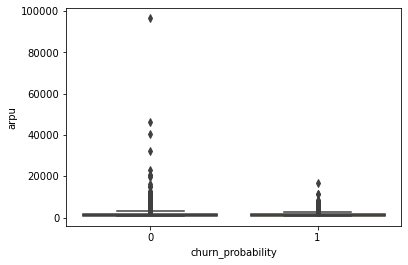

In [54]:
sns.boxplot(x="churn_probability", y="arpu", data=high_value_cust_df)

#### OBSERVATION: 

- No clear inference can be drawn

In [55]:
high_value_cust_df.groupby(by=['churn_probability']).mean()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,rchrge2_no_of_days,rchrge1_no_of_days,arpu
churn_probability,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,490.681807,510.959220,520.941924,235.68780,256.180713,255.655767,344.524672,364.189681,364.158543,14.212041,10.423870,10.200683,23.311140,15.937731,15.912002,82.871440,85.632557,84.108846,160.242246,163.115321,162.566973,6.332863,6.543573,6.284959,1.432757,1.739946,1.869534,249.455115,255.300372,252.969656,143.617534,164.267953,165.522937,156.095392,176.905053,177.072307,1.812487,1.787613,1.731899,301.529343,342.964675,344.331104,1.685259,1.740855,1.856257,5.292110,6.891501,7.294502,0.652186,0.046960,0.05938,558.623105,606.952844,606.519520,63.532090,66.239424,66.631075,148.111011,152.791675,155.647146,15.332064,16.553779,15.438037,226.984847,235.594959,237.726391,13.256315,14.725817,14.807114,28.439031,30.988766,30.700351,2.757959,2.917752,2.653890,44.456890,48.636126,48.165174,282.687371,297.099140,298.713102,0.065309,0.020098,0.033817,10.056494,11.450100,11.492316,1.115565,1.389980,1.287363,10.655277,11.099057,10.621069,573.259434,596.219551,604.721085,152.121721,157.451987,164.728985,93.428747,94.328808,98.026001,73.234356,74.655207,74.494027,224.356778,247.606614,265.780938,0.120034,0.131117,0.128432,0.486578,0.587015,0.650637,0.144961,0.157501,0.167242,0.121951,0.136869,0.145076,1299.097714,128.087851,122.410888,108.696865,-24.441364,48.507440,1522.58295
1,646.398712,537.795529,289.464999,392.63841,321.986861,145.295899,471.947302,386.176554,168.809122,28.315431,30.694834,30.862692,51.961616,48.751705,50.277864,58.154485,44.119496,19.940457,108.365821,88.467199,36.780915,3.506767,3.150489,1.766258,1.578841,2.116159,1.072282,170.034122,135.743825,58.491232,312.554298,256.632053,102.981445,320.128311,258.898633,98.638165,1.231237,1.200780,0.418332,633.918477,516.735847,202.040203,4.384558,2.895255,1.781674,6.634532,7.476169,3.320239,0.780083,0.000936,0.00104,815.761783,662.860062,265.639298,45.290582,41.088695,15.704168,98.941902,81.178067,35.038789,7.922152,6.767983,2.858430,152.162495,129.041892,53.605639,21.325977,17.345806,5.871045,34.743519,29.661887,12.650634,1.557209,1.589771,0.53034

#### OBSERVATIONS : 

 - We can see that there is a monotonous decreasing trend for average revenue per user for churned customers from the month of june to august
 - A similar trend is seen for onnet_mou, offnet_mou, loc_og_t2t_mou, loc_og_t2m_mou, loc_og_t2f_mou , loc_og_mou, std_og_t2t_mou, std_og_t2m_mou,  std_og_mou, isd_og_mou,spl_og_mou, total_og_mou...etc mou features.
 - Average age on networn - aon is less for churned customers then new customers. So, relatively new customers are more likely to churn
 - We can infer that if a customers have reduced usage of services and is relatively new then, he/she is most likely to churn


### Correlation Analysis

In [56]:
# # Plotting cluster map to check correlation between features
# sns.clustermap(telecom.corr(), annot=True, cmap="RdBu", figsize=(200,200))

In [57]:
# function to remove correlation more than a threshold value
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

In [58]:
# dropping highly correlated columns
df_new = telecom.copy()
correlation(df_new,0.85)
df_new

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,rchrge2_no_of_days,rchrge1_no_of_days
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,18.75,0.00,0.0,0.0,65.09,204.99,1.01,0.00,8.20,0.63,0.00,0.38,0.0,0.0,81.21,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,3,2,2,65,65,10,65,65,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.00,0.00,0.00,0,45,18
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,30.73,31.66,0.00,0.0,0.0,0.00,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,0,0,0.00,352.91,0.00,0.00,3.96,0.00,0,0,0,0,0,0,0,1,0,0,0,0,710,0.00,0.00,0.00,0,47,28
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,28.94,0.00,0.0,0.0,28.94,84.99,0.00,0.00,2.89,1.38,0.00,0.00,0.0,0.0,56.49,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.25,2,4,2,70,70,0,70,50,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,882,0.00,0.00,0.00,0,33,41
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,15.33,0.56,0.0,0.0,16.16,37.99,4.60,0.00,14.95,9.13,25.61,0.00,0.0,0.0,76.03,24.98,4.84,23.88,53.99,44.23,57.14,7.23,0.81,0.00,86.21,49.89,81.03,0.00,0.00,0.00,8.89,0.28,2.81,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2,4,3,110,110,50,110,110,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,982,0.00,0.00,0.00,0,35,36
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.00,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.00,9.85,0.00,58.91,25.94,15.76,4.35,0.00,0.0,0.0,4.35,0.00,0.00,0.00,0.00,17.00,0.00,0.00,0.0,0.0,63.26,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,13,10,8,50,41,30,25,10,30,390.80,308.89,213.47,0.00,0.00,0.00,0,0,0

#### OBSERVATION :
 - It's difficult to see correlation with so many features. Let's do feature selection using Random Forest or RFE

## STEP 4 : Model Selection, Model Building, and  Prediction

### Feature Selection using Random Forest Classifier

In [59]:
feature_telecom = df_new.copy()
y = feature_telecom.pop('churn_probability')
X = feature_telecom

# using stratified splitting to maintain similar percentage of churned customers
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)

In [60]:
best_feature_names = [f"feature {i}" for i in range(X.shape[1])]
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

count    108.000000
mean       0.009259
std        0.013877
min        0.000096
25%        0.002478
50%        0.005964
75%        0.009792
max        0.098814
dtype: float64

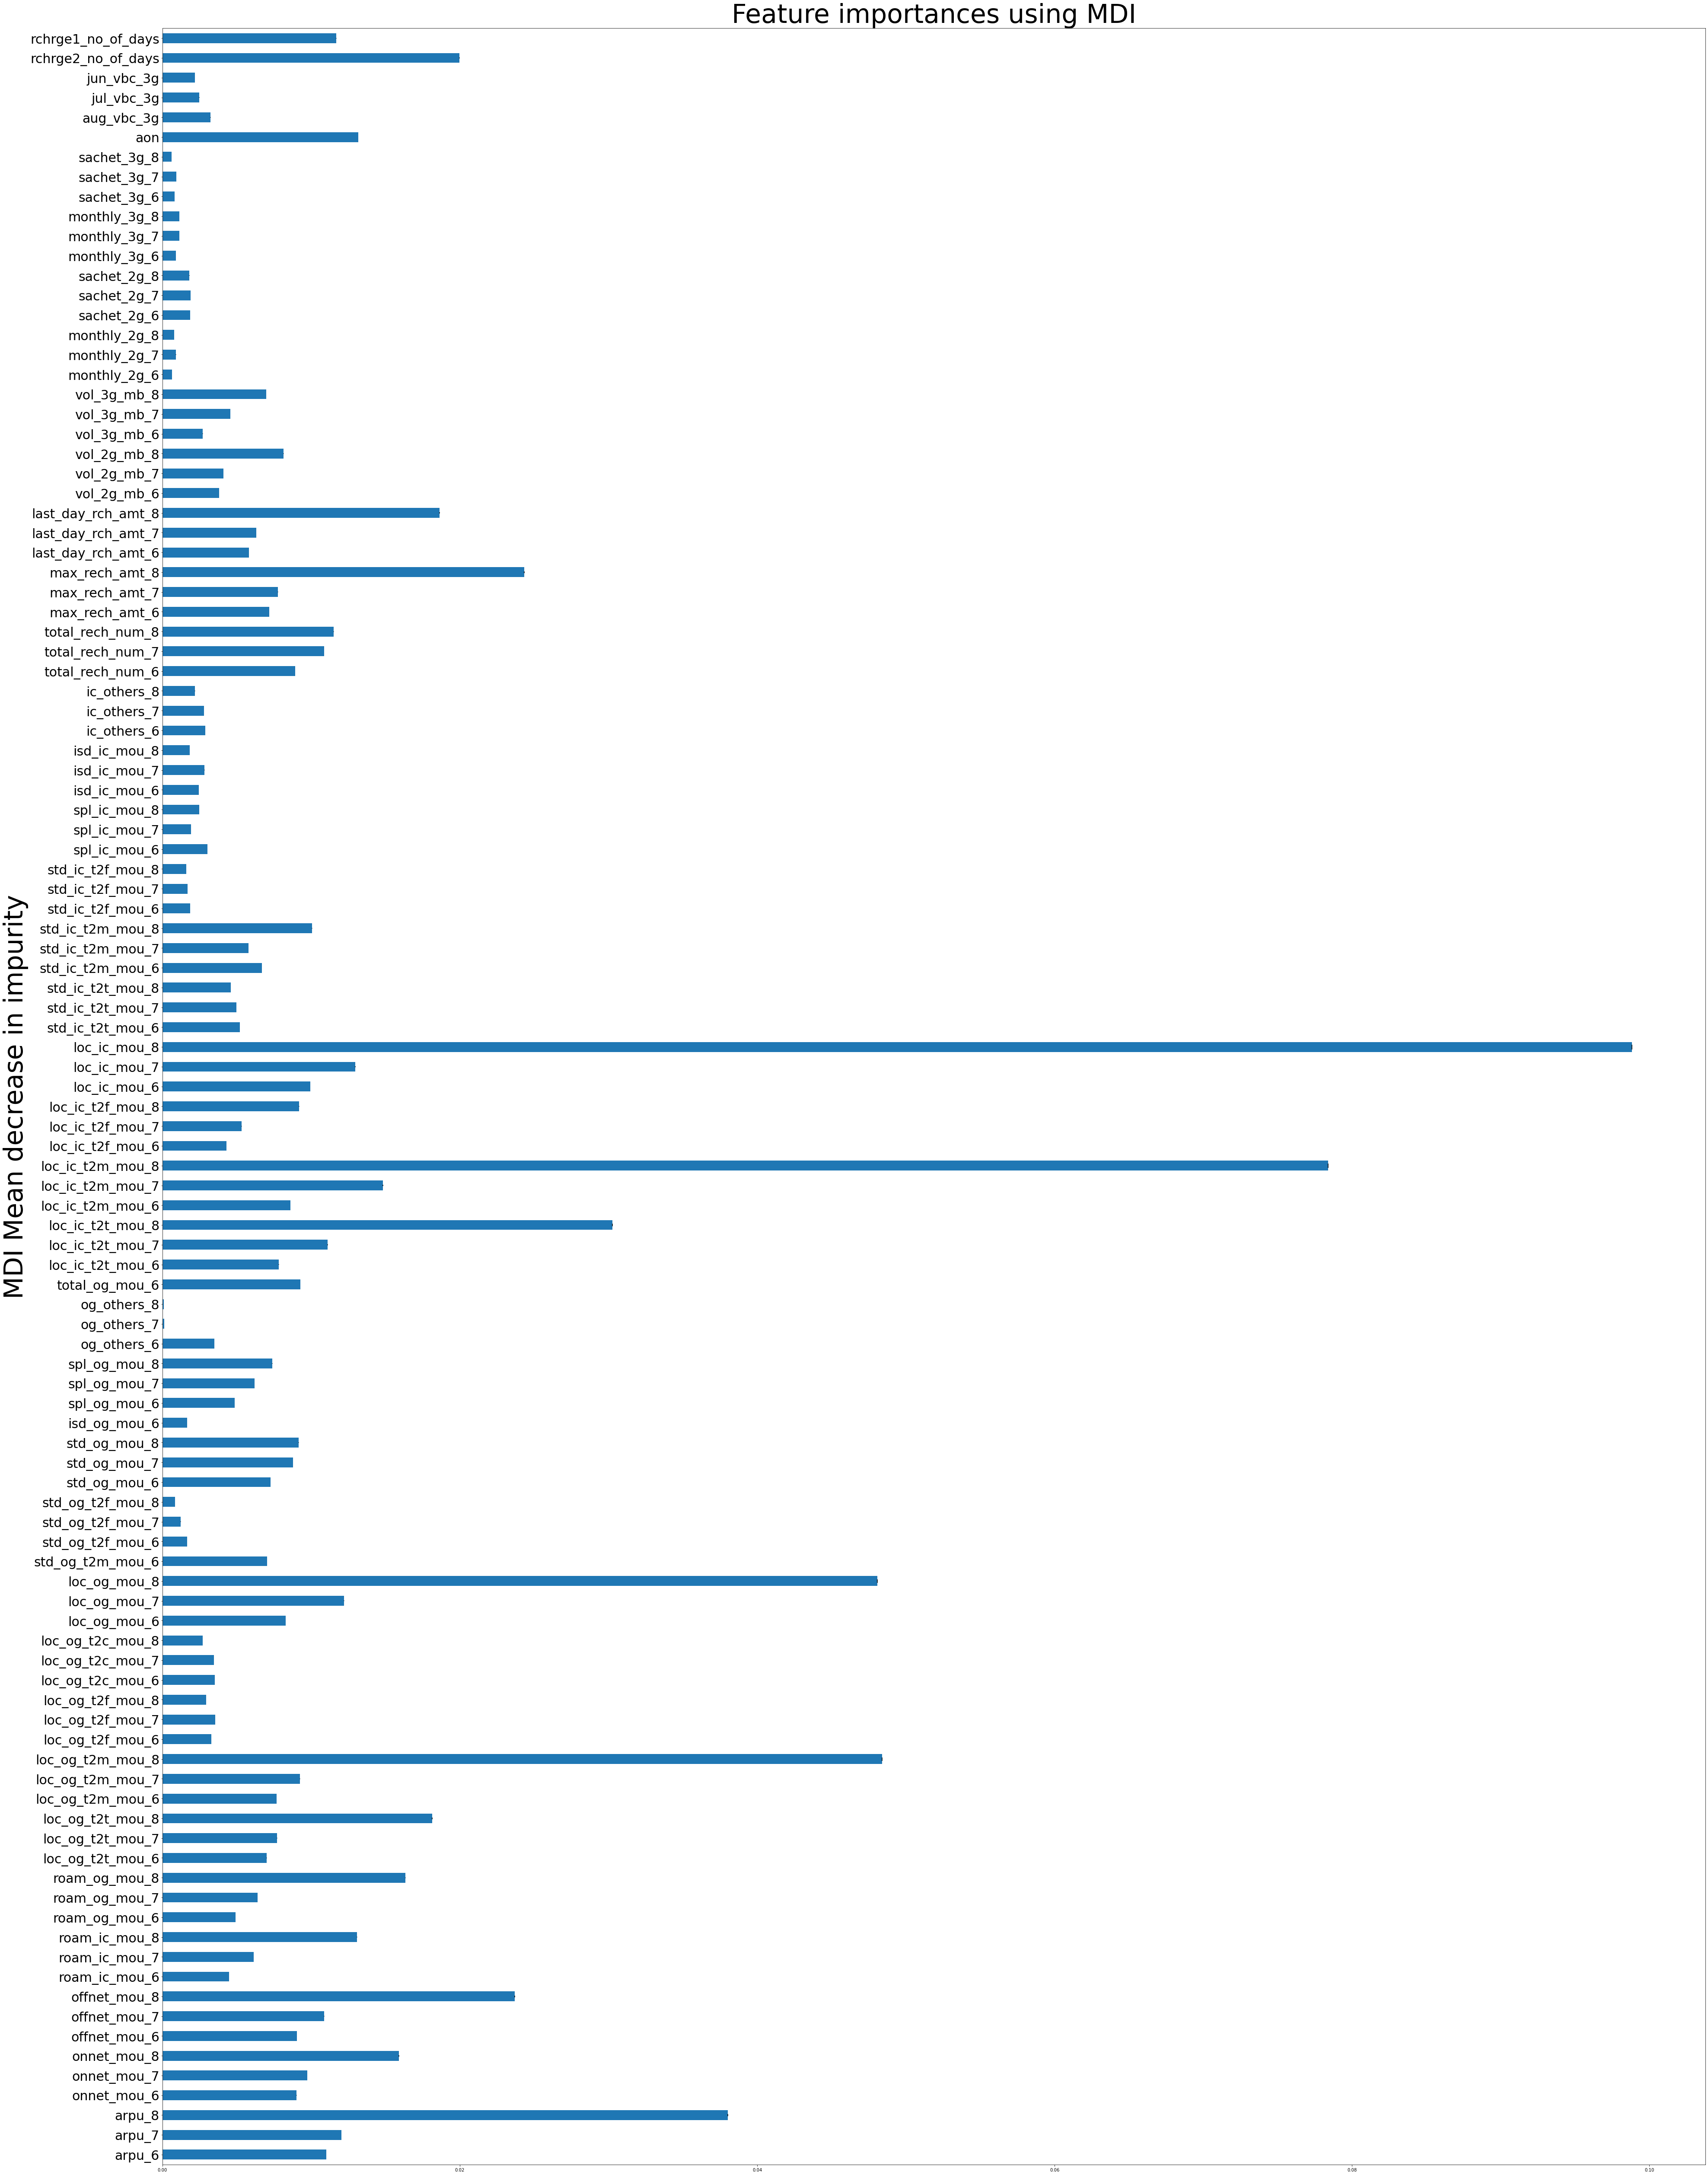

In [62]:
# plotting features based on Mean Decrease in Immunity
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots(figsize=(55,70))
forest_importances.plot.barh(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI", fontsize = 60)
ax.set_ylabel("MDI Mean decrease in impurity", fontsize = 60)
ax.tick_params(axis='y', labelsize=30)
fig.tight_layout()
forest_importances.describe()

In [63]:
# selecting the most important features
feature_imp_df = pd.DataFrame(forest_importances)
feature_imp_df.reset_index(inplace=True)
feature_imp_df.columns=['features',"importance"]
len(feature_imp_df[feature_imp_df['importance'] > 0.01])

26

In [64]:
feature_imp_df = feature_imp_df[feature_imp_df['importance']>0.01]
imp_columns = list(feature_imp_df.features)
imp_columns.append('churn_probability')
imp_columns

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_8',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2m_mou_8',
 'total_rech_num_7',
 'total_rech_num_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'aon',
 'rchrge2_no_of_days',
 'rchrge1_no_of_days',
 'churn_probability']

In [65]:
# new Dataframe with feature selection
telecom_imp_feautures_df = df_new[imp_columns].dropna()

In [66]:
telecom_imp_feautures_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_8,offnet_mou_7,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_mou_7,loc_og_mou_8,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2m_mou_8,total_rech_num_7,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,aon,rchrge2_no_of_days,rchrge1_no_of_days,churn_probability
0,31.277,87.009,7.527,1.29,96.68,2.33,0.0,0.00,0.28,2.33,16.04,2.61,3.68,7.79,21.08,16.91,24.76,24.71,14.96,2,2,10,0,1958,45,18,0
1,0.000,122.787,42.953,0.00,25.99,30.89,0.0,0.00,0.00,0.00,0.00,0.00,19.09,10.53,18.68,11.09,39.44,25.03,0.00,4,5,50,0,710,47,28,0
2,60.806,103.176,0.000,0.00,82.05,0.00,0.0,0.00,0.00,0.00,12.98,0.00,6.16,6.49,25.18,23.51,31.34,30.01,6.38,4,2,0,0,882,33,41,0
3,156.362,205.260,111.095,0.00,78.48,50.23,0.0,1.63,0.00,23.63,48.84,23.63,4.84,23.88,44.23,57.14,49.89,81.03,2.81,4,3,50,50,982,35,36,0
4,240.708,128.191,101.565,6.13,38.11,9.63,0.0,0.00,6.13,4.61,25.94,15.76,1.39,2.66,4.33,19.49,9.36,28.31,0.00,10,8,30,30,647,35,31,0


### Splitting Data


In [67]:
# train-test split in the ratio 80-20
y=telecom_imp_feautures_df.pop('churn_probability')
X=telecom_imp_feautures_df
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)


### Scaling Data

In [68]:
# using standard scalar for scaling
scaler = StandardScaler()

In [69]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# checking for scaled data
X_train_scaled_df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_8,offnet_mou_7,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_mou_7,loc_og_mou_8,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2m_mou_8,total_rech_num_7,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,aon,rchrge2_no_of_days,rchrge1_no_of_days
count,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04,5.599900e+04
mean,9.127782e-17,-1.793320e-16,-2.352208e-16,6.051745e-16,-2.479767e-16,3.621533e-16,-6.879947e-16,2.554690e-15,-2.353041e-16,4.462264e-16,4.452550e-16,2.935641e-16,3.657229e-16,-2.554218e-16,1.122138e-18,-6.372001e-18,-1.660527e-16,-8.609140e-17,-9.458529e-16,-1.965863e-16,-2.964111e-16,-1.077744e-15,-9.715973e-16,-4.916790e-19,-1.612846e-16,-4.503620e-16
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-7.436556e+00,-4.448807e+00,-3.380838e+00,-4.100122e-01,-5.948885e-01,-5.807767e-01,-1.264106e-01,-1.433313e-01,-2.863208e-01,-5.745105e-01,-5.535675e-01,-5.514811e-01,-3.139596e-01,-3.223143e-01,-6.250482e-01,-6.315702e-01,-6.356367e-01,-6.450501e-01,-2.664350e-01,-1.088804e+00,-1.001944e+00,-8.600335e-01,-6.139250e-01,-1.091798e+00,-5.108256e+00,-5.770851e+00
25%,-5.541396e-01,-5.435526e-01,-5.388171e-01,-3.964357e-01,-5.118823e-01,-5.070406e-01,-1.264106e-01,-1.433313e-01,-2.814224e-01,-5.319398e-01,-4.984550e-01,-5.036988e-01,-2.980987e-01,-3.080027e-01,-5.331060e-01,-5.465575e-01,-5.293628e-01,-5.441073e-01,-2.664350e-01,-6.652787e-01,-5.858340e-01,-6.198109e-01,-6.139250e-01,-7.896871e-01,9.072263e-02,8.783830e-03
50%,-2.508380e-01,-2.468228e-01,-2.402598e-01,-3.187503e-01,-3.277830e-01,-3.234802e-01,-1.264106e-01,-1.433313e-01,-2.199282e-01,-3.355674e-01,-3.154685e-01,-3.159737e-01,-2.162077e-01,-2.211982e-01,-3.006864e-01,-3.056570e-01,-2.932161e-01,-2.982305e-01,-2.471397e-01,-2.417538e-01,-3.084273e-01,-7.530640e-02,-3.188324e-01,-3.698839e-01,9.199775e-02,9.848938e-03
75%,2.557449e-01,2.468322e-01,2.506674e-01,-6.345857e-02,8.939507e-02,9.396761e-02,-1.264106e-01,-1.433313e-01,-4.027756e-02,1.111581e-01,9.023552e-02,9.966172e-02,-1.573459e-02,-8.537909e-03,1.477912e-01,1.569835e-01,1.475593e-01,1.630237e-01,-7.806956e-02,3.229460e-01,2.463862e-01,2.930349e-01,6.648098e-01,6.189392e-01,9.295409e-02,1.126908e-02
max,8.031564e+01,9.891470e+01,9.183900e+01,3.472424e+01,2.053306e+01,4.310984e+01,7.883134e+01,8.168322e+01,7.088921e+01,3.253008e+01,3.080124e+01,4.527930e+01,6.316119e+01,7.660238e+01,2.657806e+01,3.827333e+01,3.765271e+01,4.363306e+01,4.033415e+01,1.839334e+01,1.661338e+01,2.635718e+01,3.282007e+01,3.257552e+00,5.282370e+00,5.779543e+00


In [70]:
# scalar transform for test data
X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
# checking
X_test_scaled_df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_8,offnet_mou_7,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_mou_7,loc_og_mou_8,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2m_mou_8,total_rech_num_7,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,aon,rchrge2_no_of_days,rchrge1_no_of_days
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,0.005254,-0.004254,0.001362,0.007558,-0.003001,-0.000818,-0.003929,-0.007188,0.000480,0.006677,-0.003077,0.004195,-0.002612,-0.002182,0.000614,0.017981,0.000070,0.010624,0.015354,-0.004076,0.000891,0.005436,0.003739,0.008642,0.003402,-0.005860
std,0.884155,0.878598,0.848580,0.982676,0.991821,0.966016,0.920673,0.808427,0.962147,1.013855,0.964270,0.998790,0.940230,0.956841,0.991796,1.069247,0.985038,1.017790,1.323540,0.976624,0.990229,0.980316,1.016303,1.004114,0.999127,0.982891
min,-1.037939,-3.845901,-2.126690,-0.410012,-0.594889,-0.580777,-0.126411,-0.143331,-0.286321,-0.574511,-0.553568,-0.551481,-0.313960,-0.322314,-0.625048,-0.631570,-0.635637,-0.645050,-0.266435,-1.088804,-1.001944,-0.860033,-0.613925,-1.091798,-5.108256,-5.770851
25%,-0.550007,-0.546596,-0.532513,-0.397097,-0.508113,-0.505200,-0.126411,-0.143331,-0.280628,-0.529538,-0.496862,-0.500668,-0.297554,-0.306996,-0.532373,-0.543054,-0.526997,-0.541542,-0.266435,-0.665279,-0.585834,-0.619811,-0.613925,-0.788111,0.090723,0.008784
50%,-0.244016,-0.244979,-0.234169,-0.319894,-0.321514,-0.315745,-0.126411,-0.143331,-0.219068,-0.331697,-0.307481,-0.309933,-0.214370,-0.220479,-0.297756,-0.299518,-0.290741,-0.295001,-0.246465,-0.241754,-0.308427,-0.059292,-0.318832,-0.360426,0.091998,0.009849
75%,0.262473,0.244241,0.255183,-0.059407,0.091166,0.095114,-0.126411,-0.143331,-0.037034,0.125204,0.092268,0.104145,-0.015735,-0.011882,0.148341,0.178779,0.155043,0.175309,-0.076990,0.322946,0.246386,0.293035,0.664810,0.645472,0.092954,0.011269
max,13.048739,18.717316,15.852964,23.033104,21.485690,22.688537,43.679904,26.227249,46.120596,23.093801,25.674058,31.253388,28.350899,24.451780,18.751433,34.951380,21.770223,22.858431,74.118502,14.581616,18.139121,34.764975,43.148314,3.276467,5.282370,5.779543


## Model Building

### 1. Logistic Regression after Random Forest feature selection

In [71]:
# Logistic regression model
model_columns = list(X_train_scaled_df.columns)
model_columns=['const'] + model_columns
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_scaled)), family = sm.families.Binomial())
logm1.fit().summary(xname=model_columns)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55972
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12810.
Date:                Mon, 09 Jan 2023   Deviance:                       25620.
Time:                        12:42:31   Pearson chi2:                 8.96e+12
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1842
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1458      0.050    -82.725      0.000      -4.244      -4.048
arpu_6                 0.3284      0.025     13.259      0.000       0.280       0.377
arpu_7                 0.1571      0.042      3.708      0.000       0.074       0.240
arpu_8                -0.3797      0.050     -7.576      0.000      -0.478      -0.281
onnet_mou_8            0.0431      0.033      1.306      0.192      -0.022       0.108
offnet_mou_7           0.0972      0.032      3.060      0.002       0.035       0.160
offnet_mou_8          -0.0411      0.052     -0.795      0.427      -0.143       0.060
roam_ic_mou_8          0.0441      0.014      3.071      0.002       0.016       0.072
roam_og_mou_8          0.2036      0.016     12.403      0.000       0.171       0.236
loc_og_t2t_mou_8      -0.2036      0.619     -0.329      0.742      -1.417       1.010
loc_og_t2m_mou_8      -0.2237      0.618     -0.362      0.717      -1.436       0.988
loc_og_mou_7          -0.0464      0.052     -0.895      0.371      -0.148       0.055
loc_og_mou_8          -0.2791      0.966     -0.289      0.773      -2.172       1.614
loc_ic_t2t_mou_7      -0.1360      0.174     -0.779      0.436      -0.478       0.206
loc_ic_t2t_mou_8       2.6303      0.469      5.611      0.000       1.712       3.549
loc_ic_t2m_mou_7      -0.1832      0.200     -0.917      0.359      -0.575       0.208
loc_ic_t2m_mou_8       2.0069      0.545      3.680      0.000       0.938       3.076
loc_ic_mou_7           0.6843      0.290      2.360      0.018       0.116       1.253
loc_ic_mou_8          -6.6865      0.783     -8.538      0.000      -8.222      -5.152
std_ic_t2m_mou_8      -0.2876      0.050     -5.699      0.000      -0.386      -0.189
total_rech_num_7       0.1073      0.029      3.729      0.000       0.051       0.164
total_rech_num_8      -0.8453      0.045    -18.716      0.000      -0.934      -0.757
max_rech_amt_8        -0.1930      0.033     -5.777      0.000      -0.258      -0.128
last_day_rch_amt_8    -0.5096      0.039    -12.935      0.000      -0.587      -0.432
aon                   -0.2894      0.021    -13.560      0.000      -0.331      -0.248
rchrge2_no_of_days    -0.1369      0.012    -11.439      0.000      -0.160      -0.113
rchrge1_no_of_days    -0.2132      0.015    -14.608      0.000      -0.242      -0.185
======================================================================================
"""

#### OBSERVATION :
- p-values for many features are insignificant
- Let's do an RFE for top 15

### 2. Logistic Regression with RFE

In [72]:
log_reg = LogisticRegression()

In [73]:
# fitting RFE for 15 features
rfe = RFE(log_reg, n_features_to_select=15)
rfe = rfe.fit(X_train_scaled, y_train)

In [74]:
rfe_cols = X_train_scaled_df.columns[rfe.support_]
rfe.support_

array([ True,  True,  True, False, False, False, False,  True, False,
       False, False,  True, False,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True])

In [75]:
# checking RFE selected columns
list(zip(X_train_scaled_df.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_8', False, 10),
 ('offnet_mou_7', False, 7),
 ('offnet_mou_8', False, 12),
 ('roam_ic_mou_8', False, 8),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', False, 9),
 ('loc_og_t2m_mou_8', False, 6),
 ('loc_og_mou_7', False, 11),
 ('loc_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_7', False, 3),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_7', False, 2),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_mou_7', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2m_mou_8', True, 1),
 ('total_rech_num_7', False, 5),
 ('total_rech_num_8', True, 1),
 ('max_rech_amt_8', True, 1),
 ('last_day_rch_amt_8', True, 1),
 ('aon', True, 1),
 ('rchrge2_no_of_days', False, 4),
 ('rchrge1_no_of_days', True, 1)]

In [76]:
# top 15 features
rfe_cols = list(rfe_cols)
X_train_rfe = scaler.fit_transform(X_train[rfe_cols])
features = ['const'] + list(rfe_cols)
features

['const',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'roam_og_mou_8',
 'loc_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2m_mou_8',
 'total_rech_num_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'aon',
 'rchrge1_no_of_days']

In [77]:
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary(xname=features)

# all p-values are significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55983
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12902.
Date:                Mon, 09 Jan 2023   Deviance:                       25805.
Time:                        12:43:10   Pearson chi2:                 1.10e+13
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1815
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.1694      0.050    -83.477      0.000      -4.267      -4.071
arpu_6                 0.3548      0.025     14.310      0.000       0.306       0.403
arpu_7                 0.2660      0.033      8.141      0.000       0.202       0.330
arpu_8                -0.4555      0.054     -8.439      0.000      -0.561      -0.350
roam_og_mou_8          0.2438      0.015     16.461      0.000       0.215       0.273
loc_og_mou_8          -0.6107      0.092     -6.657      0.000      -0.791      -0.431
loc_ic_t2t_mou_8       2.5175      0.423      5.953      0.000       1.689       3.346
loc_ic_t2m_mou_8       1.8501      0.497      3.725      0.000       0.877       2.824
loc_ic_mou_7           0.4519      0.044     10.290      0.000       0.366       0.538
loc_ic_mou_8          -6.5046      0.713     -9.126      0.000      -7.902      -5.108
std_ic_t2m_mou_8      -0.2679      0.049     -5.462      0.000      -0.364      -0.172
total_rech_num_8      -0.8549      0.038    -22.614      0.000      -0.929      -0.781
max_rech_amt_8        -0.2578      0.035     -7.442      0.000      -0.326      -0.190
last_day_rch_amt_8    -0.5249      0.040    -13.245      0.000      -0.603      -0.447
aon                   -0.2803      0.021    -13.351      0.000      -0.321      -0.239
rchrge1_no_of_days    -0.1428      0.013    -11.346      0.000      -0.167      -0.118
======================================================================================
"""

### Checking VIF

In [78]:
# checking VIF
vif = pd.DataFrame()
X_train_vif = pd.DataFrame(X_train_rfe,columns=rfe_cols)
vif['Features'] = rfe_cols
vif['VIF'] = [variance_inflation_factor(X_train_vif[rfe_cols].values, i) for i in range(X_train_vif[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# loc_ic_mou_8 has a high VIF

,Features,VIF
8,loc_ic_mou_8,47.84
6,loc_ic_t2m_mou_8,22.50
5,loc_ic_t2t_mou_8,15.89
2,arpu_8,3.88
1,arpu_7,3.63
7,loc_ic_mou_7,3.40
0,arpu_6,2.43
11,max_rech_amt_8,2.35
12,last_day_rch_amt_8,1.95
4,loc_og_mou_8,1.46


In [79]:
# removing loc_ic_mou_8 for very high VIF, showing multi-collinearity
rfe_cols.remove('loc_ic_mou_8')

In [80]:
X_train_rfe = scaler.fit_transform(X_train[rfe_cols])
features = ['const'] + list(rfe_cols)

# checking VIF again
vif = pd.DataFrame()
X_train_vif = pd.DataFrame(X_train_rfe,columns=rfe_cols)
vif['Features'] = rfe_cols
vif['VIF'] = [variance_inflation_factor(X_train_vif[rfe_cols].values, i) for i in range(X_train_vif[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# all vif looks good, in acceptable range

,Features,VIF
2,arpu_8,3.87
1,arpu_7,3.63
7,loc_ic_mou_7,3.18
0,arpu_6,2.43
10,max_rech_amt_8,2.35
6,loc_ic_t2m_mou_8,2.19
11,last_day_rch_amt_8,1.95
5,loc_ic_t2t_mou_8,1.86
4,loc_og_mou_8,1.46
9,total_rech_num_8,1.46


In [81]:
X_train_sm = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary(xname=features)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                55999
Model:                            GLM   Df Residuals:                    55984
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12975.
Date:                Mon, 09 Jan 2023   Deviance:                       25951.
Time:                        12:43:32   Pearson chi2:                 6.17e+11
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1794
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0979      0.048    -85.278      0.000      -4.192      -4.004
arpu_6                 0.3604      0.025     14.562      0.000       0.312       0.409
arpu_7                 0.2811      0.032      8.656      0.000       0.217       0.345
arpu_8                -0.4745      0.054     -8.793      0.000      -0.580      -0.369
roam_og_mou_8          0.2487      0.015     16.674      0.000       0.219       0.278
loc_og_mou_8          -0.6500      0.093     -7.012      0.000      -0.832      -0.468
loc_ic_t2t_mou_8      -1.1945      0.115    -10.425      0.000      -1.419      -0.970
loc_ic_t2m_mou_8      -2.6350      0.103    -25.476      0.000      -2.838      -2.432
loc_ic_mou_7           0.3733      0.042      8.861      0.000       0.291       0.456
std_ic_t2m_mou_8      -0.2855      0.050     -5.743      0.000      -0.383      -0.188
total_rech_num_8      -0.8386      0.038    -22.261      0.000      -0.912      -0.765
max_rech_amt_8        -0.2678      0.035     -7.737      0.000      -0.336      -0.200
last_day_rch_amt_8    -0.5267      0.040    -13.310      0.000      -0.604      -0.449
aon                   -0.3050      0.021    -14.650      0.000      -0.346      -0.264
rchrge1_no_of_days    -0.1448      0.013    -11.490      0.000      -0.169      -0.120
======================================================================================
"""

In [82]:
# predictions
y_train_pred = res.predict(X_train_sm)
y_train_pred

array([2.49861810e-01, 5.29231712e-04, 1.19476045e-02, ...,
       6.28187075e-02, 4.93340102e-02, 3.31033506e-05])

In [83]:
# creating dataframe with true and predicted churn
y_train_pred_final_df = pd.DataFrame({'True_Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final_df['Pred_Churn'] = y_train_pred_final_df.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [84]:
y_train_pred_final_df

,True_Churn,Churn_Prob,Pred_Churn
0,1,0.249862,1
1,0,0.000529,0
2,0,0.011948,0
3,0,0.000018,0
4,0,0.022006,0
...,...,...,...
55994,0,0.014023,0
55995,0,0.000018,0
55996,0,0.062819,0
55997,0,0.049334,0


In [85]:
# lets see Confusion matrix 
confusion_matrix = metrics.confusion_matrix(y_train_pred_final_df.True_Churn, y_train_pred_final_df.Pred_Churn )
print(confusion_matrix)

[[37892 12367]
 [  862  4878]]


In [86]:
print("Train data Accuracy :",metrics.accuracy_score(y_train_pred_final_df.True_Churn, y_train_pred_final_df.Pred_Churn))

Train data Accuracy : 0.7637636386364042


### Computing Metrics

In [87]:
# Calculating other metrics 
TP = confusion_matrix[1,1] # true positives
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [88]:
print("Senstivity/Recall: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
print("FPR: ",FP/ float(TN+FP))
print("Precision:",TP / float(TP+FP))

Senstivity/Recall:  0.8498257839721254
Specificity:  0.7539346186752621
FPR:  0.24606538132473785
Precision: 0.2828645984343288


### ROC Curve

In [89]:
def draw_roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(4, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final_df.True_Churn, y_train_pred_final_df.Churn_Prob, drop_intermediate = False )

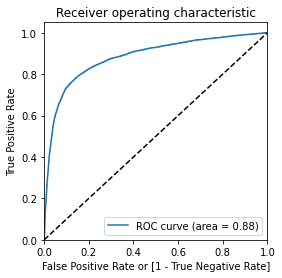

In [91]:
draw_roc_curve(y_train_pred_final_df.True_Churn, y_train_pred_final_df.Churn_Prob)

### Selecting cutoff

In [92]:
# Selecting the cut off probability above which we will classify customer as churned
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final_df[i]= y_train_pred_final_df.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final_df.head()

,True_Churn,Churn_Prob,Pred_Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.249862,1,1,1,1,0,0,0,0,0,0,0
1,0,0.000529,0,1,0,0,0,0,0,0,0,0,0
2,0,0.011948,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000018,0,1,0,0,0,0,0,0,0,0,0
4,0,0.022006,0,1,0,0,0,0,0,0,0,0,0


In [93]:
# Lets check metrics at different cut-off
cut_off_df = pd.DataFrame(columns = ['cut_off','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [float(x)/10 for x in range(10)]
for i in num:
    c_m1 = metrics.confusion_matrix(y_train_pred_final_df.True_Churn, y_train_pred_final_df[i] )
    total1=sum(sum(c_m1))
    accuracy = (c_m1[0,0]+c_m1[1,1])/total1    
    speci = c_m1[0,0]/(c_m1[0,0]+c_m1[0,1])
    sensi = c_m1[1,1]/(c_m1[1,0]+c_m1[1,1])
    cut_off_df.loc[i] =[i,accuracy,sensi,speci]
cut_off_df

,cut_off,accuracy,sensitivity,specificity
0.0,0.0,0.102502,1.000000,0.000000
0.1,0.1,0.763764,0.849826,0.753935
0.2,0.2,0.873516,0.749477,0.887682
0.3,0.3,0.911106,0.623693,0.943930
0.4,0.4,0.918606,0.425958,0.974870
0.5,0.5,0.910516,0.206794,0.990887
0.6,0.6,0.905141,0.109233,0.996041
0.7,0.7,0.899945,0.039199,0.998249
0.8,0.8,0.898302,0.014460,0.999244
0.9,0.9,0.897998,0.006794,0.999781


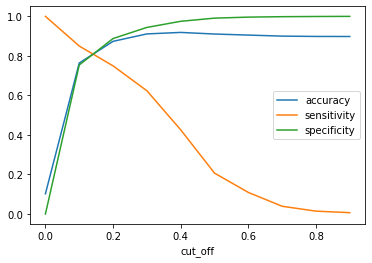

In [94]:
cut_off_df.plot.line(x='cut_off', y=['accuracy','sensitivity','specificity'])
plt.show()

In [95]:
y_train_pred_final_df = pd.DataFrame({'True_Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final_df['Pred_Churn'] = y_train_pred_final_df.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [96]:
# Precision and Recall
print("Precision: ",precision_score(y_train_pred_final_df.True_Churn, y_train_pred_final_df.Pred_Churn))
print("Recall: ",recall_score(y_train_pred_final_df.True_Churn, y_train_pred_final_df.Pred_Churn))
print("F1 Score: ", f1_score(y_train_pred_final_df.True_Churn, y_train_pred_final_df.Pred_Churn))

Precision:  0.2828645984343288
Recall:  0.8498257839721254
F1 Score:  0.42445072873613227


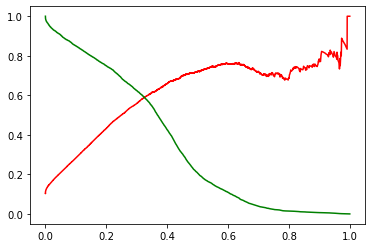

In [97]:
# Precision-Recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final_df.True_Churn, y_train_pred_final_df.Churn_Prob)
plt.plot(thresholds, p[:-1], "r-")
plt.plot(thresholds, r[:-1], "g-")
plt.show()

### Predicting on Test data

In [98]:
X_test_scaled = scaler.transform(X_test[rfe_cols])
X_test_sm = sm.add_constant(X_test_scaled)

In [100]:
X_test.shape

(14000, 26)

In [101]:
rfe_cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'roam_og_mou_8',
 'loc_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_mou_7',
 'std_ic_t2m_mou_8',
 'total_rech_num_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'aon',
 'rchrge1_no_of_days']

In [93]:
y_test_pred = res.predict(X_test_sm)

In [94]:
y_pred_final = pd.DataFrame({"Churn_Prob":y_test_pred, "True_Churn":y_test})
y_pred_final['Pred_Churn'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_pred_final

,Churn_Prob,True_Churn,Pred_Churn
3425,0.447873,1,1
33067,0.530809,1,1
52420,0.397181,0,1
5220,0.088683,0,0
33958,0.226489,1,1
...,...,...,...
26667,0.010526,0,0
23021,0.027416,0,0
322,0.068530,0,0
59049,0.025216,0,0


In [95]:
confusion_test = metrics.confusion_matrix(y_pred_final.True_Churn, y_pred_final.Pred_Churn )
confusion_test

array([[9598, 3010],
       [ 217, 1175]], dtype=int64)

In [96]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [97]:
print("Test Accuracy:",metrics.accuracy_score(y_pred_final.True_Churn, y_pred_final.Pred_Churn))
print("Senstivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))

Test Accuracy: 0.7695
Senstivity:  0.8441091954022989
Specificity:  0.7612626903553299


In [98]:
# creating a dataframe for model selection
evaluation_df = pd.DataFrame(data=np.zeros((5,2)), index=['Logistic Reg', 'GBM', 'Log Reg with PCA', 'XGBoost', 'Random Forest'], columns=['Accuracy', 'Sensitivity'])
evaluation_df.loc['Logistic Reg', 'Accuracy'] = round(metrics.accuracy_score(y_pred_final.True_Churn, y_pred_final.Pred_Churn), 3)
evaluation_df.loc['Logistic Reg', 'Sensitivity'] = round(TP / float(TP+FN), 3)
evaluation_df

,Accuracy,Sensitivity
Logistic Reg,0.77,0.844
GBM,0.00,0.000
Log Reg with PCA,0.00,0.000
XGBoost,0.00,0.000
Random Forest,0.00,0.000


##  PCA

In [99]:
# scaling the features before doing PCA
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.76889836,  0.50719031, -0.76961238, ..., -0.463407  ,
         0.09167897,  5.77812281],
       [-0.36554863, -0.28527968, -0.55703867, ...,  0.10823993,
         0.09295409,  0.00665361],
       [ 0.07674707,  0.53849252,  0.36957962, ...,  0.3404715 ,
         0.09359165,  0.00842879],
       ...,
       [-0.32585944, -0.260786  , -0.35513837, ...,  0.96676115,
         0.09295409,  0.01304426],
       [ 0.26764669,  0.08244319,  0.00882053, ...,  0.16813676,
         0.08849117,  0.00878383],
       [ 0.74048469,  1.87069998,  1.64695171, ...,  2.45997858,
         0.08976629,  0.00878383]])

In [100]:
# fitting pca model
pca = PCA(random_state=42)
pca.fit(X_train_scaled)
# pca components
pca.components_

array([[ 2.22130335e-01,  2.59839953e-01,  2.66534606e-01,
         1.54451119e-01,  2.30364219e-01,  2.35047984e-01,
         2.69471790e-02,  4.41750520e-02,  1.89850525e-01,
         2.78256324e-01,  2.85048428e-01,  2.97610741e-01,
         1.51981318e-01,  1.61571082e-01,  2.32721791e-01,
         2.38574327e-01,  2.52391658e-01,  2.61861496e-01,
         5.83822816e-02,  1.45122090e-01,  1.42388170e-01,
         1.76947138e-01,  1.43963011e-01,  6.07684952e-02,
         2.91224074e-02,  9.19547042e-03],
       [ 2.14314255e-01,  2.60333140e-01,  2.67506656e-01,
         1.63199961e-01,  2.21688189e-01,  2.21437617e-01,
         8.81643229e-02,  1.49302611e-01, -1.53870830e-02,
        -9.48046518e-03, -1.81101966e-02, -1.62191581e-02,
        -3.05308036e-01, -3.04821880e-01, -2.44785677e-01,
        -2.40534307e-01, -3.54314112e-01, -3.48267400e-01,
         4.02978667e-02,  1.94173014e-01,  2.03328008e-01,
         1.04308631e-01,  6.94759618e-02, -1.05440554e-01,
         2.31

In [101]:
# calculating cumulative variances
var_cumulative = np.cumsum(pca.explained_variance_ratio_)

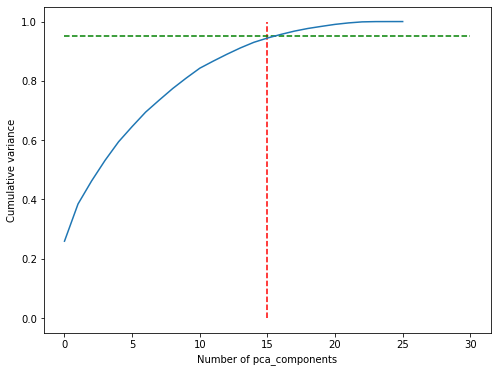

In [102]:
# Cumulative variance explained against number of pca components
fig = plt.figure(figsize=[8,6])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumulative)
plt.ylabel("Cumulative variance")
plt.xlabel("Number of pca_components")
plt.show()

# from the below curve, optimum number of features are 15 to explain 95% variance

In [103]:
pca_final = IncrementalPCA(n_components=15)
X_train_scaled.shape

(55999, 26)

In [104]:
# PCA fitting
df_train_pca = pca_final.fit_transform(X_train_scaled)
df_test_pca = pca_final.transform(X_test_scaled)

In [105]:
corr_mat = np.corrcoef(df_train_pca.transpose())

<AxesSubplot:>

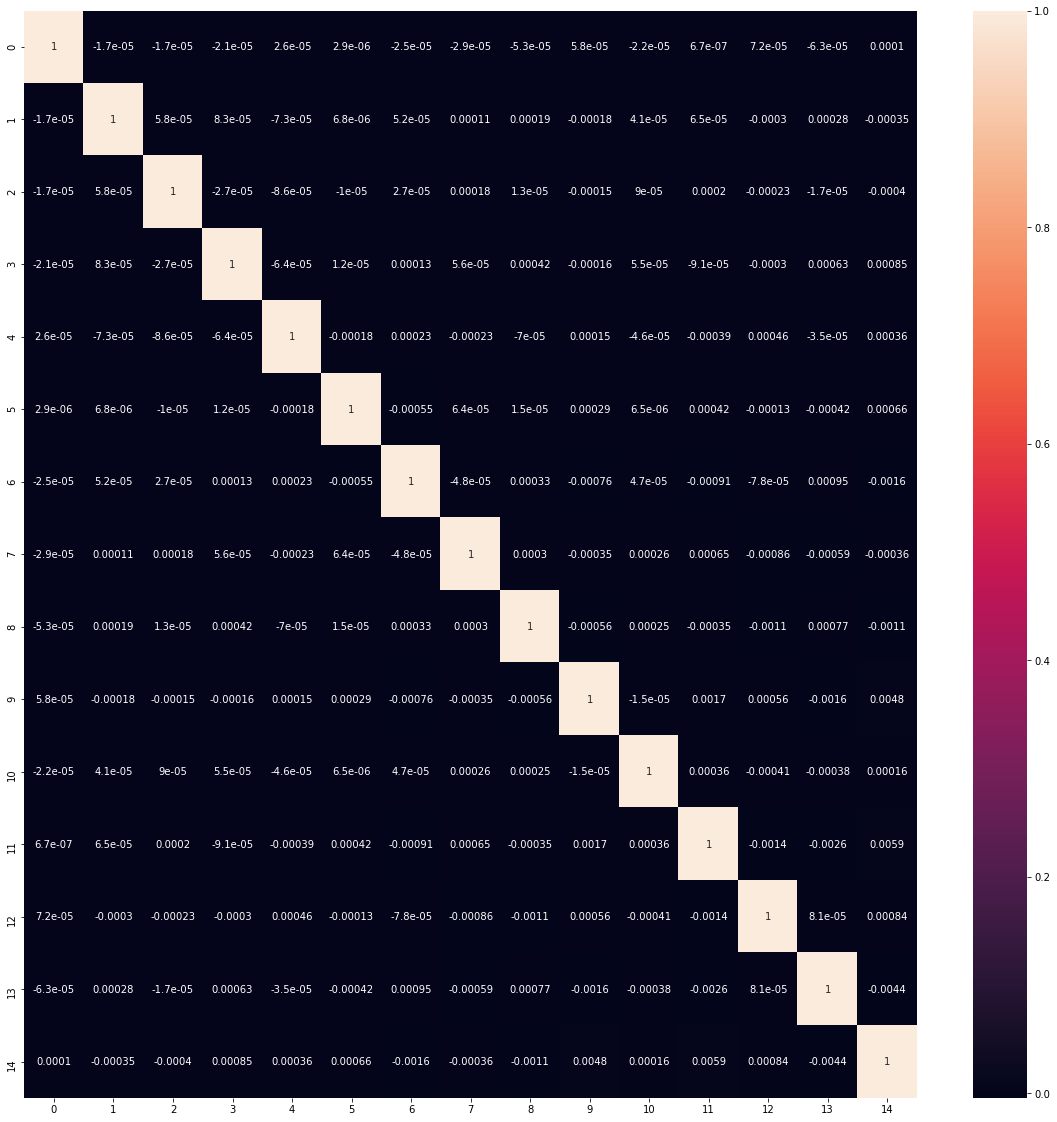

In [106]:
# heatmap for pca components
plt.figure(figsize=[20,20])
sns.heatmap(corr_mat, annot=True)

# clearly no multicollinearity

In [107]:
X_test_scaled = scaler.transform(X_test)
df_test_pca_final = pca_final.transform(X_test_scaled)
df_test_pca_final

array([[-1.10506936, -0.91480597,  1.32623048, ..., -0.04881576,
         1.95578698, -0.42590121],
       [-0.37641418, -1.48054993,  0.61913835, ...,  0.19758613,
         0.15410482, -0.0713325 ],
       [-2.50847796,  0.17793536, -0.16142377, ...,  0.44999095,
        -0.33213466,  0.03303525],
       ...,
       [-1.29820154, -1.01172223,  0.14371547, ...,  0.06056654,
         0.33842412, -0.54853176],
       [-0.45232139,  0.59301503,  1.48485514, ..., -0.38743087,
         0.34133939, -0.15725266],
       [ 1.57320959, -1.584581  ,  1.58975271, ..., -0.09836652,
         0.28501757,  0.13743303]])

## 3. GBM Model

In [108]:
gb = GradientBoostingClassifier(random_state=42)
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [109]:
# fitting GBM on df_train_pca
gb.fit(df_train_pca, y_train)
gb_pred_train = gb.predict(df_train_pca)
gb_pred_test = gb.predict(df_test_pca)

In [110]:
print("Train Accuracy :", accuracy_score(y_train, gb_pred_train))
print("Train Sensitivity :", recall_score(y_train, gb_pred_train))
print("Test Accuracy :", accuracy_score(y_test, gb_pred_test))
print("Test Sensitivity :", recall_score(y_test, gb_pred_test))

Train Accuracy : 0.9289630171967357
Train Sensitivity : 0.5050522648083624
Test Accuracy : 0.9276428571428571
Test Sensitivity : 0.4827586206896552


In [111]:
evaluation_df.loc['GBM', 'Accuracy'] = round(accuracy_score(y_test, gb_pred_test), 3)
evaluation_df.loc['GBM', 'Sensitivity'] = round(recall_score(y_test, gb_pred_test), 3)
evaluation_df

,Accuracy,Sensitivity
Logistic Reg,0.770,0.844
GBM,0.928,0.483
Log Reg with PCA,0.000,0.000
XGBoost,0.000,0.000
Random Forest,0.000,0.000


## 4. Logistic Regression with PCA

In [112]:
# fitting LR
X_train_sm = sm.add_constant(df_train_pca)
y_train = pd.DataFrame(y_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
X_test_sm = sm.add_constant(df_test_pca)

In [113]:
# predictions
y_test_pred = res.predict(X_test_sm)

In [114]:
# classifying based on cut off 0.1
y_test_pred_final = pd.DataFrame({'True_Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['Pred_Churn'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [115]:
print("Test Accuracy :",metrics.accuracy_score(y_test_pred_final.True_Churn, y_test_pred_final.Pred_Churn))
print("Test Sensitivity :",metrics.recall_score(y_test_pred_final.True_Churn, y_test_pred_final.Pred_Churn))

Test Accuracy : 0.7663571428571428
Test Sensitivity : 0.8247126436781609


In [116]:
evaluation_df.loc['Log Reg with PCA', 'Accuracy'] = round(accuracy_score(y_test_pred_final.True_Churn, y_test_pred_final.Pred_Churn), 3)
evaluation_df.loc['Log Reg with PCA', 'Sensitivity'] = round(recall_score(y_test_pred_final.True_Churn, y_test_pred_final.Pred_Churn), 3)
evaluation_df

,Accuracy,Sensitivity
Logistic Reg,0.770,0.844
GBM,0.928,0.483
Log Reg with PCA,0.766,0.825
XGBoost,0.000,0.000
Random Forest,0.000,0.000


## 5. XGBoost

In [117]:
xgb_model = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_model.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [118]:
# model fitting
xgb_model.fit(df_train_pca, y_train)
# predictions
xgb_pred = xgb_model.predict(df_test_pca)

In [119]:
print("Test Accuracy :",metrics.accuracy_score(y_test, xgb_pred))
print("Test Sensitivity :",metrics.recall_score(y_test, xgb_pred))

Test Accuracy : 0.9271428571428572
Test Sensitivity : 0.5043103448275862


In [120]:
evaluation_df.loc['XGBoost', 'Accuracy'] = round(accuracy_score(y_test, xgb_pred), 3)
evaluation_df.loc['XGBoost', 'Sensitivity'] = round(recall_score(y_test, xgb_pred), 3)
evaluation_df

,Accuracy,Sensitivity
Logistic Reg,0.770,0.844
GBM,0.928,0.483
Log Reg with PCA,0.766,0.825
XGBoost,0.927,0.504
Random Forest,0.000,0.000


## 6. Random Forest

In [121]:
# random forest with hyperparameter tuning using GridsearchCV
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [122]:
# GridSearchCV
params = {
    'max_depth': [40,50,60],
    'min_samples_leaf': [3],
    'min_samples_split':[5],    
    'n_estimators': [95,100,110]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(feature_telecom,y)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [40, 50, 60], 'min_samples_leaf': [3],
                         'min_samples_split': [5],
                         'n_estimators': [95, 100, 110]},
             scoring='accuracy', verbose=1)

In [123]:
# checking the best accuracy
grid_search.best_score_


0.9419563273003355

In [124]:
# Best Hyperparameters
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=50, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=95, n_jobs=-1, random_state=42)

In [125]:
rf = RandomForestClassifier(max_depth=50, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=95, n_jobs=-1, random_state=42,oob_score = True)
rf.fit(feature_telecom,y)


RandomForestClassifier(max_depth=50, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=95, n_jobs=-1, oob_score=True,
                       random_state=42)

In [126]:
print("OOB score: ", rf.oob_score_)

OOB score:  0.941699167130959


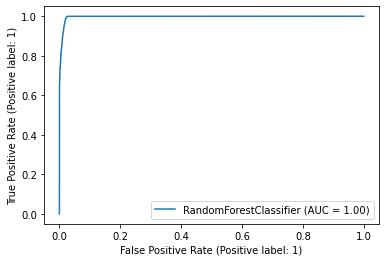

In [127]:
# Receiver Operating Characteristic
plot_roc_curve(rf, feature_telecom,y)
plt.show()

In [128]:
rf_pred = rf.predict(feature_telecom)

In [129]:
print("Test Accuracy :",metrics.accuracy_score(y, rf_pred))
print("Test Sensitivity :",metrics.recall_score(y, rf_pred))

Test Accuracy : 0.9745710653009328
Test Sensitivity : 0.7888390353337073


In [130]:
# Now we can compare all our models by looking at below dataframe of metrics for different models
evaluation_df.loc['Random Forest', 'Accuracy'] = round(accuracy_score(y, rf_pred), 3)
evaluation_df.loc['Random Forest', 'Sensitivity'] = round(recall_score(y, rf_pred), 3)
evaluation_df

,Accuracy,Sensitivity
Logistic Reg,0.770,0.844
GBM,0.928,0.483
Log Reg with PCA,0.766,0.825
XGBoost,0.927,0.504
Random Forest,0.975,0.789


## Model Selection

- We have got two great models : 
  - i) Logistic Regression with highest sensitivity
  - ii) Random Forest with highest accuracy
- Even though Random Forest has little low Sensitivity as compared to Log Reg but it's accuracy is pretty high on test data
- So, let's consider Random Forest for our Kaggle submission
- And Logistic Regression with feature selection using Random Forest and RFE as our final model

## Kaggle Submission

In [131]:
# reading the test file
kaggle_test= pd.read_csv("test (1).csv")
kaggle_test["date_of_last_rech_6"] = pd.to_datetime(kaggle_test['date_of_last_rech_6'])
kaggle_test["date_of_last_rech_7"] = pd.to_datetime(kaggle_test['date_of_last_rech_7'])
kaggle_test["date_of_last_rech_8"] = pd.to_datetime(kaggle_test['date_of_last_rech_8'])
kaggle_test['rchrge1_no_of_days']=(kaggle_test['date_of_last_rech_7'] - kaggle_test['date_of_last_rech_6']).dt.days
kaggle_test['rchrge2_no_of_days']=(kaggle_test['date_of_last_rech_8'] - kaggle_test['date_of_last_rech_7']).dt.days

kaggle_test = kaggle_test.fillna(0)
kaggle_test = pd.DataFrame(kaggle_test)
kaggle_id = kaggle_test['id']

In [132]:
kaggle_test = kaggle_test[feature_telecom.columns]

In [133]:
# Kaggle predictions
final_pred_kaggle = rf.predict(kaggle_test)

In [134]:
result = pd.DataFrame({"id":kaggle_id,"churn_probability":final_pred_kaggle})
result.to_csv('Submission.csv', header=True,index=False)

## Conclusion

- Our primary aim is to reduce customer churn, so it becomes utmost important to identify potential churning customers
- Given this scenario, the most important metric will be **SENSITIVITY**
- Logistic Regression with feature selection using Random Forest and RFE becomes the best model from business perspective
- This model has
    - accuracy = 0.77 (**77% of the predictions are correct**)
    - sensitivity = 0.84 (**84% of the customers who are churning can be identified**)

**Most important features are -**
- 'arpu_6',
- 'arpu_7',
- 'arpu_8',
- 'roam_og_mou_8',
- 'loc_og_mou_8',
- 'loc_ic_t2t_mou_8',
- 'loc_ic_t2m_mou_8',
- 'loc_ic_mou_7',
- 'std_ic_t2m_mou_8',
- 'total_rech_num_8',
- 'max_rech_amt_8',
- 'last_day_rch_amt_8',
- 'aon',
- 'rchrge1_no_of_days'

## STEP 5: Business Recommendations

- Average revenue per user (arpu) shows a constant decline from June to August for churning customers. **So, sales team may talk to customers who are showing this decreasing trend and may provide discounts and offers as per their need.**
- roam_og_mou_8 is an important predictor variable looks like customers are churning for better roaming plans. **Business can come up with better roaming packs for it's customers**
- There is a decrease in incoming and outgoing calls usage for churning customers. **If business finds a decrease in the mou then they should try to retain those customers by coming up with better offers, most likely unlimited plans etc. This may be also due to poor network service in some area. In this case, network needs to be improved in that area **
- Same trend is observed with recharge columns. A decrease in average recharge amount or increase in number of days since last recharge is an indicator of churn. **Provide offers and discounts**
- Age on network 'aon' is also an important feature. Old customers are least likely to churn. However, relatively new customers are most likely to churn. **Sales team must provide some offers to new high revenue customers, so that they do not churn**